**Reto | Mercadotecnia Telefónica con Aprendizaje Supervisado**

Introducción:  

Los programas de telemarketing se han venido usando por las empresas durante años como una forma de comunicarse con clientes potenciales de manera directa por vía telefónica. En los últimos años el uso de las técnicas de inteligencia artificial ha permitido potencializar el impacto de estos programas de mercadotecnia.

Un banco ha lanzado un nuevo plan de inversión a largo plazo a través de un programa de telemarketing y desea saber que tan exitoso se puede considerar este programa utilizando técnicas de aprendizaje supervisado. El programa es lanzado a clientes del banco, por lo que este estudio ayudará a optimizar los esfuerzos al conocer las características de los clientes más propensos a adquirir dicho plan de inversión.

 En la presente actividad tu objetivo es predecir si el entrevistado adquirirá el plan de inversión bancario de acuerdo con varias características que se conocen de dicho cliente.

1. Deberás utilizar el archivo llamado bank_marketing.csv. con los datos de problema.
2. Utilizar el archivo bank-names.txt para obtener información de cada una de las variables.
3. Crear un proyecto tipo Jupyter Notebook en Google-Colab llamado Solucion_Reto_SC_63_<nombre_y_apellido_del_estudiante>.ipynb.
4. Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.

In [2]:
import pandas as pd

#Lectura del archivo bank_marketing_RETO_DS_AS.csv y asignacion al dataframe data
data = pd.read_csv("bank_marketing_RETO_DS_AS.csv")

data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


5. Obtener la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.

In [3]:
# Número de registros
num_registros = data.shape[0]
print(f"Número de registros: {num_registros}")

# Número de variables
num_variables = data.shape[1]
print(f"Número de variables: {num_variables}")

# Tipo de cada variable
print("\nTipos de cada variable:")
print(data.dtypes)

# Datos perdidos
print("\nCantidad de datos perdidos en cada variable:")
print(data.isnull().sum())

Número de registros: 9000
Número de variables: 17

Tipos de cada variable:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Cantidad de datos perdidos en cada variable:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


6. Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.


In [4]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# * Usamos OrdinalEncoder para la columna 'education' porque existe se identifica un orden
#   (unknown < primary < secondary < tertiary) que deseamos conservar numéricamente.
# * Usamos OneHotEncoder para variables categóricas nominales (sin un orden específico),
#   convirtiendo cada categoría en una columna distinta (variables dummy).
# * Usamos LabelEncoder para la variable objetivo 'y', al ser binaria ('yes'/'no').

# Definimos el orden para la columna 'education'
education_order = ['unknown', 'primary', 'secondary', 'tertiary']

# Creamos los transformadores.
# OrdinalEncoder para la variable education.
ordinal_transformer = OrdinalEncoder(categories=[education_order])
# OneHotEncoder para variables categóricas nominales.
onehot_transformer = OneHotEncoder(drop='first')

# Definicion de la columna ordinal
categorical_ordinal_cols = ["education"]

# Definicion de las columnas categoricas
categorical_onehot_cols = ["job", "marital", "default",
                           "housing", "loan", "contact",
                           "month", "poutcome"]

# Definimos una lista de las columnas numéricas para mantenerlas sin cambios
numeric_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# Construimos el ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('education_ordinal', ordinal_transformer, categorical_ordinal_cols),
        ('categorical_ohe', onehot_transformer, categorical_onehot_cols)
    ],
    # El resto de columnas (numéricas) las pasamos directamente
    remainder='passthrough'
)

# Codificamos la columan 'y' con LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['y'])

# Ajustamos y transformamos los datos (exceptuando 'y')
transformed_data = column_transformer.fit_transform(data.drop(columns='y'))

# Para crear un DataFrame con el resultado transformado, primero
# recuperamos los nombres de las columnas generadas por OneHotEncoder
ohe_feature_names = column_transformer.named_transformers_['categorical_ohe'] \
                                     .get_feature_names_out(categorical_onehot_cols)

# Obtenemos el arreglo final de columnas resultantes: (1) la ordinal de 'education', (2) las de one-hot, y (3) las numéricas
final_columns = (categorical_ordinal_cols
                 + list(ohe_feature_names)
                 + numeric_cols)

# Creamos el DataFrame final con las transformaciones
transformed_df = pd.DataFrame(transformed_data, columns=final_columns)

# Añadimos la variable objetivo codificada al final
transformed_df['y'] = y_encoded

# Mostramos la información del DataFrame transformado
print(transformed_df.info())
print(transformed_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   education          9000 non-null   float64
 1   job_blue-collar    9000 non-null   float64
 2   job_entrepreneur   9000 non-null   float64
 3   job_housemaid      9000 non-null   float64
 4   job_management     9000 non-null   float64
 5   job_retired        9000 non-null   float64
 6   job_self-employed  9000 non-null   float64
 7   job_services       9000 non-null   float64
 8   job_student        9000 non-null   float64
 9   job_technician     9000 non-null   float64
 10  job_unemployed     9000 non-null   float64
 11  job_unknown        9000 non-null   float64
 12  marital_married    9000 non-null   float64
 13  marital_single     9000 non-null   float64
 14  default_yes        9000 non-null   float64
 15  housing_yes        9000 non-null   float64
 16  loan_yes           9000 

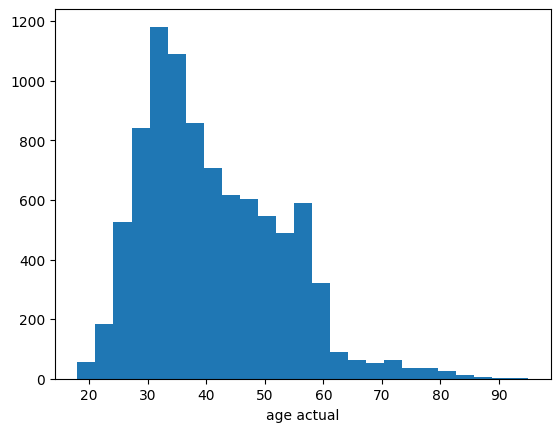

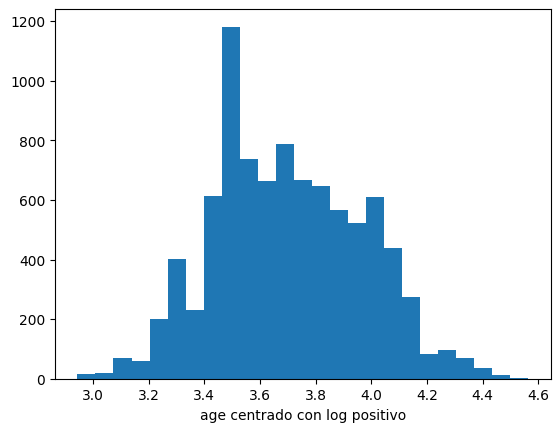

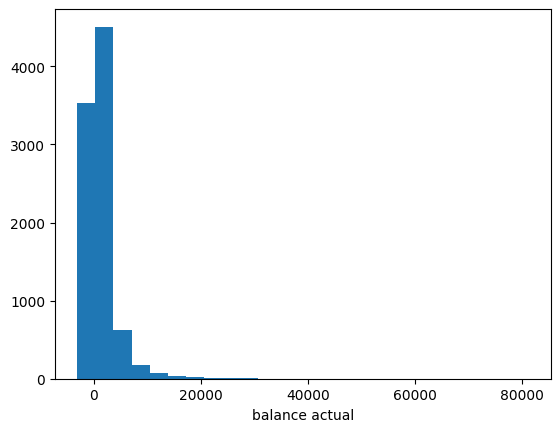

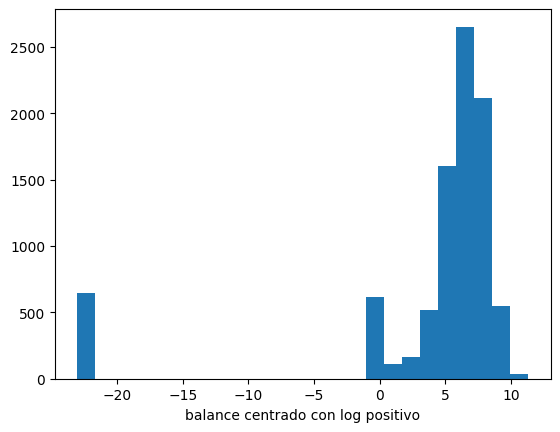

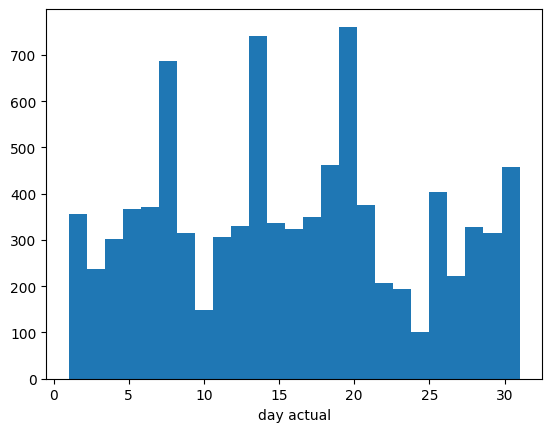

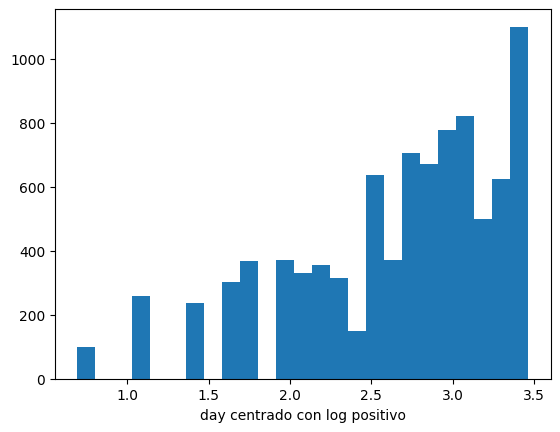

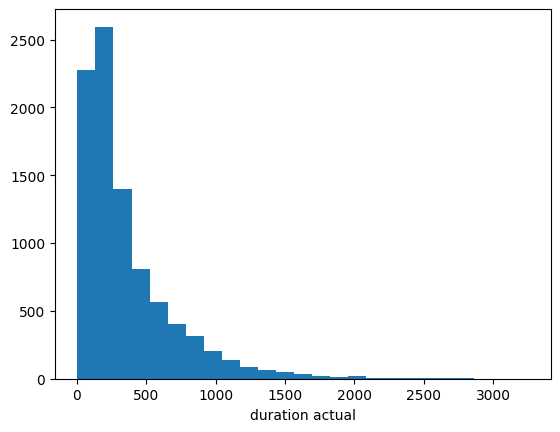

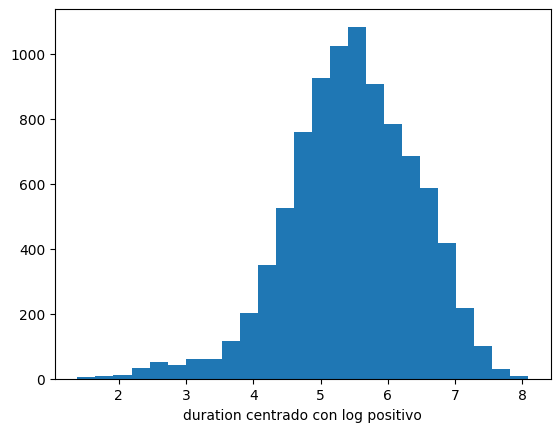

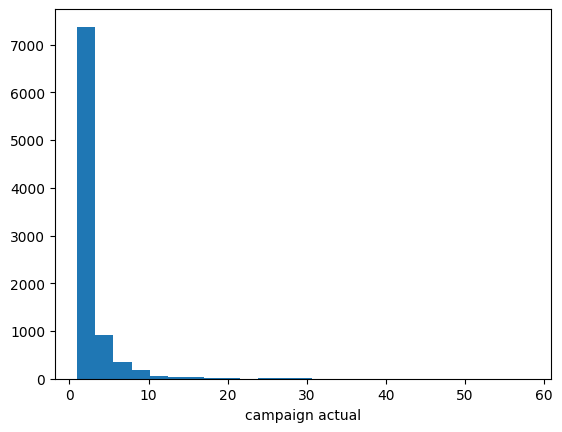

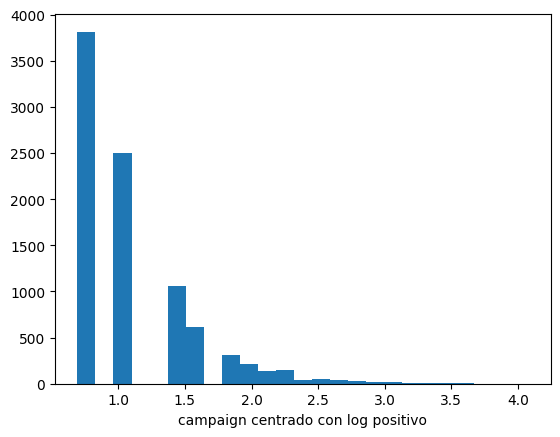

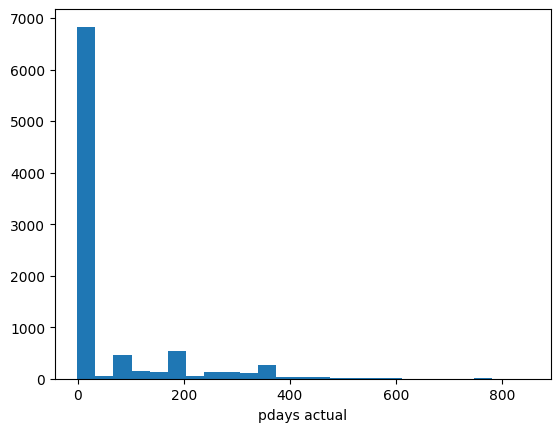

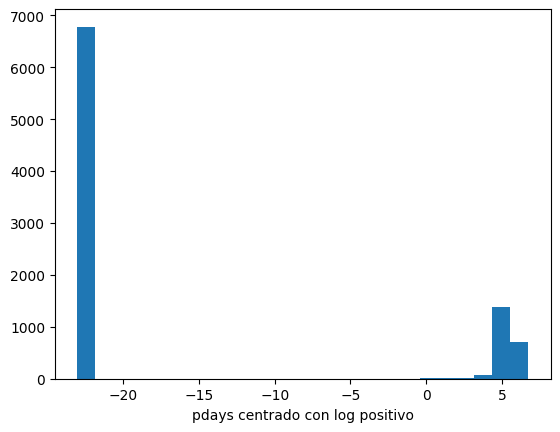

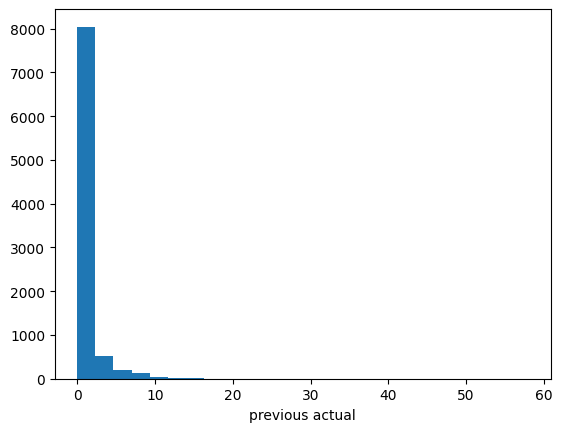

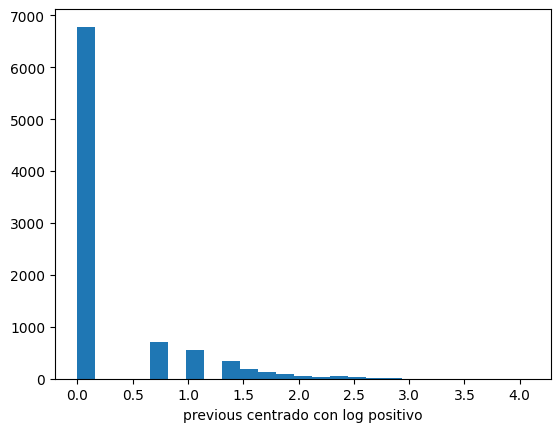

In [5]:
import matplotlib.pyplot as plt
import numpy as np
age = np.array(transformed_df["age"])
balance = np.array(transformed_df["balance"])
day = np.array(transformed_df["day"])
duration = np.array(transformed_df["duration"])
campaign = np.array(transformed_df["campaign"])
pdays = np.array(transformed_df["pdays"])
previous = np.array(transformed_df["previous"])

def fun1(X):
  # Ensure X + 1 is always positive to avoid -inf
  X_plus_1 = np.where(X > -1, X + 1, 1e-10)  # Replace values <= -1 with a small positive number
  return np.log(X_plus_1)

def fun2(X):
  # Ensure 1-X is always positive to avoid -inf
  result = 1 - X
  result = np.where(result > 0, result, 1e-10)  # Replace non-positive values with a small positive number
  return np.log(result)

def grafica_tansformacion(variable, nom_variable):
  plt.hist(variable, bins=25)
  plt.xlabel(f"{nom_variable} actual")
  plt.show()

  plt.hist(fun1(variable), bins=25)
  plt.xlabel(f"{nom_variable} centrado con log positivo")
  plt.show()
  '''

  plt.hist(fun2(variable), bins=25)
  plt.xlabel(f"{nom_variable} centrado con log negativo")
  plt.show()

  plt.hist(np.power(variable, 0.2), bins = 25)
  plt.xlabel(f"{nom_variable} centrado con potencia")
  plt.show()

  plt.hist(np.sqrt(variable), bins = 25)
  plt.xlabel(f"{nom_variable} centrado con raíz cuadrada")
  plt.show()
  '''

#"age", "balance", "day", "duration", "campaign", "pdays", "previous"
grafica_tansformacion(age, "age")
grafica_tansformacion(balance, "balance")
grafica_tansformacion(day, "day")
grafica_tansformacion(duration, "duration")
grafica_tansformacion(campaign, "campaign")
grafica_tansformacion(pdays, "pdays")
grafica_tansformacion(previous, "previous")


7. Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Copiamos el DataFrame para trabajar las transformaciones
df_transformed = transformed_df.copy()

# Identificamos columnas numéricas
numeric_cols = skewed_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Paso 1: Transformación logarítmica en caso de fuerte asimetría
# Justificación:
#    - Una distribución muy asimétrica (skewness alto) puede sesgar el análisis
#      y/o los modelos predictivos.
#    - La transformación logarítmica (log1p) tiende a comprimir valores grandes,
#      reduciendo la asimetría y pudiendo mejorar el rendimiento del modelo.
#    - La operación np.log1p(x) se aplica únicamente si x >= 0 para todos los
#      valores de la columna.

# Se define el umbral del sesgo. Un sesgo o Skewness menor a -1 o mayor a 1:
# Se considera una asimetría sustancial. Los datos tienen una cola notablemente larga
# en un lado, lo que puede afectar el análisis y los modelos.

skew_threshold = 1

for col in numeric_cols:
    # Se calcula la asimetría de los datos en esa columna con la función skew
    skew_val = df_transformed[col].skew()
    print(f"Skewness de {col}: {skew_val}")
    if abs(skew_val) > skew_threshold:
        # Verificamos si la columna tiene todos los valores >= 0
        if (df_transformed[col] >= 0).all():
            df_transformed[col] = np.log1p(df_transformed[col])

# Estandarización de las columnas numéricas. La estandarización (media = 0,
# desviación estándar = 1) homogeniza la escala de todas las variables numéricas
# y evita que una variable con un rango muy grande domine al resto en un modelo.
scaler = StandardScaler()
df_transformed[numeric_cols] = scaler.fit_transform(df_transformed[numeric_cols])

# Observamos la información resultante
print(df_transformed.info())
print(df_transformed.head())


Skewness de age: 0.801429198170957
Skewness de balance: 7.28003559845937
Skewness de day: 0.11731504466354789
Skewness de duration: 2.184045170114823
Skewness de campaign: 5.392711897043994
Skewness de pdays: 2.3491770049454486
Skewness de previous: 7.682285869595014
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   education          9000 non-null   float64
 1   job_blue-collar    9000 non-null   float64
 2   job_entrepreneur   9000 non-null   float64
 3   job_housemaid      9000 non-null   float64
 4   job_management     9000 non-null   float64
 5   job_retired        9000 non-null   float64
 6   job_self-employed  9000 non-null   float64
 7   job_services       9000 non-null   float64
 8   job_student        9000 non-null   float64
 9   job_technician     9000 non-null   float64
 10  job_unemployed     9000 non-null   float64
 

8. Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.
9. Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [7]:
from sklearn.model_selection import train_test_split

# Separamos la variable de salida (y) del resto de variables (X)
X = df_transformed.drop("y", axis=1)
y = df_transformed["y"]

# Dividimos inicialmente en entrenamiento (60%) y un conjunto temporal (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,      # 40% se mantiene para validación + prueba
    random_state=42     # semilla para reproducibilidad
)

# Dividimos el 40% restante en validación (20% total) y prueba (20% total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42
)

# Verificamos los tamaños de cada subconjunto
print(f"Tamaño de entrenamiento: {X_train.shape[0]} registros")
print(f"Tamaño de validación: {X_val.shape[0]} registros")
print(f"Tamaño de prueba: {X_test.shape[0]} registros")


Tamaño de entrenamiento: 5400 registros
Tamaño de validación: 1800 registros
Tamaño de prueba: 1800 registros


10. Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Definimos el modelo base de Regresión Logística usando como solver la funcion lbfgs
modelo = LogisticRegression(max_iter=1000)

# Definimos un rango de valores para la regularización.
parametros = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2','elasticnet','none'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
}

# Configuramos GridSearchCV para encontrar el mejor conjunto de parámetros
grid_search = GridSearchCV(
    estimator=modelo,
    param_grid=parametros,
    scoring='accuracy',   # Podrías emplear otra métrica
    cv=5,                 # Se usarán 5 particiones internas para validación cruzada
    n_jobs=-1,            # Usa todos los núcleos disponibles
    verbose=1
)

# Ajustamos con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtenemos el mejor estimador y sus parámetros
best_model = grid_search.best_estimator_
print("Mejores parámetros encontrados en GridSearchCV:", grid_search.best_params_)

# Predecimos sobre el conjunto de validación
y_val_pred = best_model.predict(X_val)

# Se imprime la Matriz de Confusión y métricas
cm = confusion_matrix(y_val, y_val_pred)
print("Matriz de Confusión en validación:")
print(cm)

print("\nReporte de Clasificación en validación:")
print(classification_report(y_val, y_val_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mejores parámetros encontrados en GridSearchCV: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Matriz de Confusión en validación:
[[894 164]
 [166 576]]

Reporte de Clasificación en validación:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1058
           1       0.78      0.78      0.78       742

    accuracy                           0.82      1800
   macro avg       0.81      0.81      0.81      1800
weighted avg       0.82      0.82      0.82      1800



11. Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

In [10]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

mlp = MLPClassifier()

# Parametros para la red neuronal
param_grid = {
    'hidden_layer_sizes': [ (15, 4)],
    'max_iter': [5000],
}

# Configuramos la búsqueda por grid con validación cruzada interna
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,      # validación cruzada interna
    n_jobs=-1, # usar todos los núcleos disponibles
    verbose=1
)

grid_search.fit(X_train, y_train)

best_mlp = grid_search.best_estimator_
print("Mejores parámetros encontrados en GridSearchCV:", grid_search.best_params_)

y_val_pred = best_mlp.predict(X_val)

# Mostramos la matriz de confusión y el reporte de clasificación
cm_val = confusion_matrix(y_val, y_val_pred)
print("\nMatriz de Confusión en validación:")
print(cm_val)

print("\nReporte de Clasificación en validación:")
print(classification_report(y_val, y_val_pred))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores parámetros encontrados en GridSearchCV: {'hidden_layer_sizes': (15, 4), 'max_iter': 5000}

Matriz de Confusión en validación:
[[886 172]
 [121 621]]

Reporte de Clasificación en validación:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1058
           1       0.78      0.84      0.81       742

    accuracy                           0.84      1800
   macro avg       0.83      0.84      0.83      1800
weighted avg       0.84      0.84      0.84      1800



12. Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.


In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

# Seleccionamos el modelo de Red Neuronal porque obtuvo mejor desempeño en la fase
# de validación (accuracy: 0.84) contra el de Regresión Logística (accuracy: 0.82).

best_mlp = MLPClassifier(
    hidden_layer_sizes=(15, 4),
    max_iter=5000
)

best_mlp.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_test_pred = best_mlp.predict(X_test)

# Calculamos la matriz de confusión y reporte de clasificación en prueba
cm_test = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión en prueba:\n", cm_test)

print("Reporte de Clasificación en prueba:")
print(classification_report(y_test, y_test_pred))


Matriz de confusión en prueba:
 [[871 134]
 [151 644]]
Reporte de Clasificación en prueba:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1005
           1       0.83      0.81      0.82       795

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800



13. Incluye tus conclusiones del problema, en particular, ¿qué puedes decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?

El uso de modelos de aprendizaje supervisado como la regresión logistica y redes neurales, ofrece un abanico de herramientas que podemos utilizar y evaluar para utilizar la que mejores resultados nos ofrezca para una situación en particular. Asi podemos tenemos mayor probabilidad de determinr el exito de una compaña, optimizando recursos y esfuerzos.
Es importante observar la importancia de la habilidad de manejar una gran cantidad de datos y diversidad de variables, que haciendo un correcto tratamiento y transformación de dichos datos, mejoran las posibilidad de obtener buenos resultados.